In [1]:
suppressPackageStartupMessages({
    library(Matrix)
    library(ggplot2)
    library(cygnus)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(ggthemes)
    library(viridis)
    library(patchwork)
    library(glue)
    library(sf)
    library(ComplexHeatmap)
    library(RSpectra)
    library(mclust)
    library(Seurat)
    })

fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}


In [2]:
counts = readRDS('../data/counts1.rds')
meta_data = readRDS('../data/meta1.rds')
meta_vars_include = c('type_lvl1', 'type_lvl2', 'hubID')


In [3]:
meta_data

cell    library    X        Y        ntx ngene nblank type_lvl1 
1    C788246 Patient002 5575.161 10049.24  90  62   1      Epithelial
2    C788248 Patient002 5548.940 10058.77 503 138   0      Epithelial
3    C788249 Patient002 5549.603 10101.12 213  99   3      Lymphocyte
4    C788250 Patient002 5570.112 10099.79 245  85   2      Myeloid   
5    C788252 Patient002 5552.255 10001.83 104  41   1      Myeloid   
6    C788254 Patient002 5553.034 10034.65 145  71   3      Myeloid   
7    C788256 Patient002 5526.782 10045.01 253  99   1      Epithelial
8    C788258 Patient002 5521.134 10039.19 174  78   0      Epithelial
9    C788259 Patient002 5536.508 10044.90 197  72   2      Epithelial
10   C788261 Patient002 5549.094 10043.83 284 112   0      Fibroblast
11   C788262 Patient002 5558.538 10046.28 157  85   1      Lymphocyte
12   C788265 Patient002 5588.443 10086.39  87  52   3      Vascular  
13   C788266 Patient002 5580.036 10119.69 257  91   3      Myeloid   
14   C788267 Patient002 5505.020 10123.83 121  57   0      Fibroblast
15   C788268 Patient002 5510.502 10138.36 201  90   3      Epithelial
16   C788270 Patient002 5519.783 10148.99  98  55   1      Fibroblast
17   C788271 Patient002 5510.063 10148.43  72  41   2      Epithelial
18   C788272 Patient002 5536.763 10158.56 184  80   1      Vascular  
19   C788273 Patient002 5551.876 10169.74 392 138   3      Epithelial
20   C788274 Patient002 5525.135 10160.18 203  89   3      Myeloid   
21   C788275 Patient002 5573.783 10164.27 121  45   3      Epithelial
22   C788277 Patient002 5535.146 10168.81 225  93   4      Epithelial
23   C788278 Patient002 5517.837 10176.79 205  85   2      Epithelial
24   C788280 Patient002 5551.482 10181.51  37  30   0      Epithelial
25   C788281 Patient002 5583.386 10182.34  30  25   0      Epithelial
26   C788282 Patient002 5546.230 10185.42  28  20   1      Epithelial
27   C788297 Patient002 5544.796 10003.24 121  61   1      Myeloid   
28   C788300 Patient002 5561.585 10003.51 245  82   1      Fibroblast
29   C788302 Patient002 5526.380 10004.21 168  60   0      Fibroblast
30   C788303 Patient002 5510.757 10006.82 142  65   2      Fibroblast
⋮    ⋮       ⋮          ⋮        ⋮        ⋮   ⋮     ⋮      ⋮         
3148 C802547 Patient002 5939.327 10196.78 23  21    0      Vascular  
3149 C802548 Patient002 5821.275 10196.09 21  19    0      Vascular  
3150 C802550 Patient002 5844.787 10359.96 11  11    0      Fibroblast
3151 C802552 Patient002 5904.278 10242.02 19  18    0      Lymphocyte
3152 C802554 Patient002 5962.195 10215.90 16  15    0      Lymphocyte
3153 C802555 Patient002 5998.349 10277.43 11  10    0      Fibroblast
3154 C802557 Patient002 5984.476 10416.62 25  18    1      Epithelial
3155 C802559 Patient002 5975.760 10462.54 33  27    0      Epithelial
3156 C802560 Patient002 5938.667 10471.46 17  16    0      Epithelial
3157 C802561 Patient002 5989.503 10392.35 10  10    0      Fibroblast
3158 C802563 Patient002 5941.029 10465.57 15  15    0      Epithelial
3159 C802564 Patient002 5902.512 10464.32 51  35    0      Epithelial
3160 C802565 Patient002 5833.679 10481.94 13  13    0      Epithelial
3161 C802567 Patient002 5984.582 10477.08 15  14    0      Epithelial
3162 C802568 Patient002 5944.879 10443.43 12  12    0      Epithelial
3163 C802569 Patient002 5984.800 10451.21 14  12    0      Epithelial
3164 C802572 Patient002 5890.756 10431.74 18  17    0      Epithelial
3165 C802573 Patient002 5880.939 10484.11 11   9    0      Epithelial
3166 C802575 Patient002 5908.801 10498.98 13  13    0      Epithelial
3167 C802576 Patient002 5987.465 10440.52 11  10    0      Fibroblast
3168 C802579 Patient002 5832.424 10439.96 36  31    0      Epithelial
3169 C802580 Patient002 5954.863 10402.59 12  12    0      Epithelial
3170 C804023 Patient002 5585.667 10094.60 15  15    0      Fibroblast
3171 C804025 Patient002 5718.605 10005.05 10   8    0      Epithelial
3172 C804026 Patient002 5708.296 10067.49 12  10    0      Fibroblast
3173 C804027 Pa

NULL

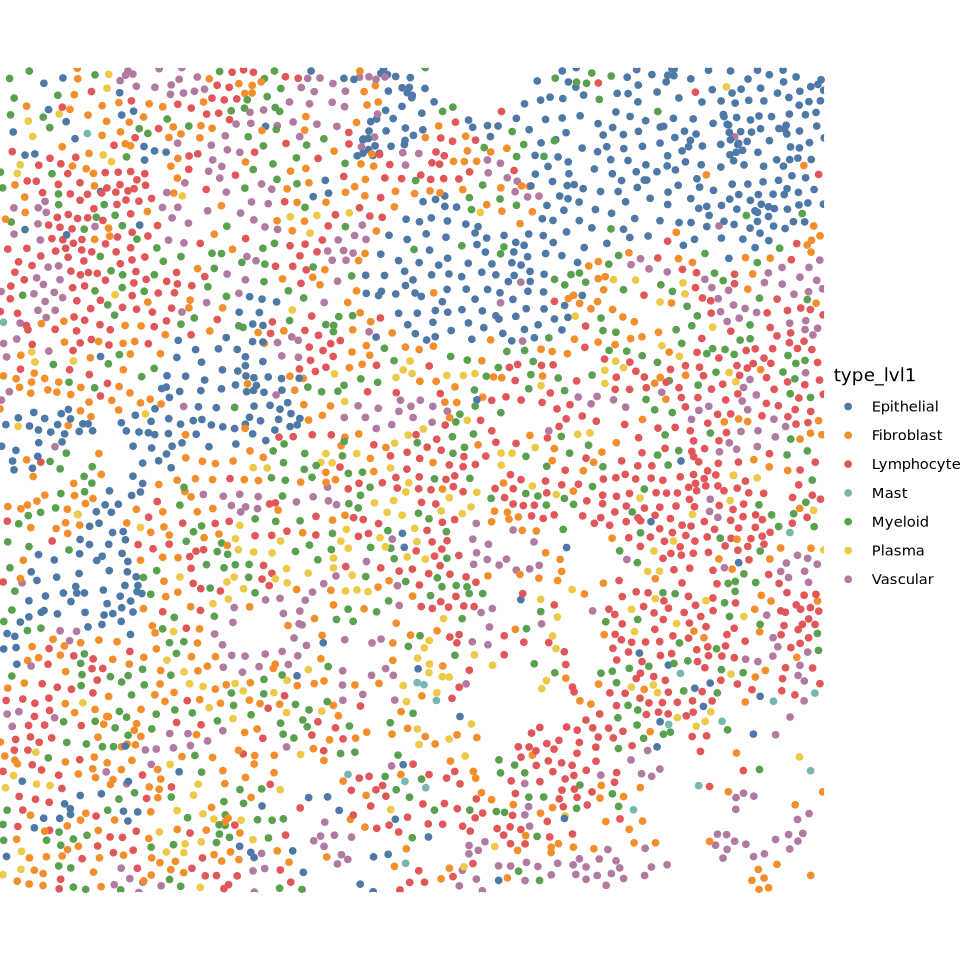

In [4]:
fig.size(8, 8)
# Plot by broad cell types (type_lvl1)
ggplot() +
    geom_point(data = meta_data, aes(X, Y, color=type_lvl1)) +
    theme_void() +
    scale_color_tableau() +
    coord_sf(expand = FALSE) 
    NULL
    
    

In [5]:
table(meta_data$type_lvl1)


Epithelial Fibroblast Lymphocyte       Mast    Myeloid     Plasma   Vascular 
       634        588        829         18        491        206        411 

In [6]:
table(meta_data$type_lvl2)


                           B               CD1C+ITGAX+ DC 
                          46                           12 
                       CD4 T                        CD8 T 
                         351                           61 
          CXCL10+ Macrophage                CXCL13+ CD4 T 
                          34                           27 
               CXCL13+ CD8 T                   Epithelial 
                           6                          634 
        FCN1+LYZ+ Macrophage                   Fibroblast 
                          11                          588 
                    FLT3+ DC       FOLR2+CD14+ Macrophage 
                           8                          113 
                         ILC         LAMP3+CCL19+ mreg DC 
                          63                           29 
              LAMP3+CD1C+ DC            MARCO+ Macrophage 
                           6                           18 
                        Mast            MERTK+ Macropha

# Get tiles
1. dmt: cell-level information
2. aggs: tile-level information

The two are tied together through dmt$pts$agg_id

In [7]:
res = GetTiles(
    meta_data$X, meta_data$Y, counts, meta_data, c('type_lvl1', 'type_lvl2'),
    max_npts = 50,
    min_npts = 5,
    smooth_distance = 'projected', smooth_similarity = 'projected'
)
dmt = res$dmt
aggs = res$aggs

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



In [11]:
dmt

  [[ suppressing 33 column names ‘C788246’, ‘C788248’, ‘C788249’ ... ]]



$pts
             X        Y ORIG_ID  type_lvl1              type_lvl2        f
         <num>    <num>   <int>     <char>                 <char>    <num>
   1: 5575.161 10049.24       1 Epithelial             Epithelial 1.270484
   2: 5548.940 10058.77       2 Epithelial             Epithelial 1.165277
   3: 5549.603 10101.12       3 Lymphocyte                  CD4 T 1.498917
   4: 5570.112 10099.79       4    Myeloid      MERTK+ Macrophage 1.723642
   5: 5552.255 10001.83       5    Myeloid FOLR2+CD14+ Macrophage 2.399105
  ---                                                                     
3142: 5658.867 10023.69    3173   Vascular               Vascular 2.090844
3143: 5971.179 10017.04    3174 Fibroblast             Fibroblast 3.086088
3144: 5897.598 10030.09    3175 Fibroblast             Fibroblast 3.516956
3145: 5945.931 10188.47    3176    Myeloid      MARCO+ Macrophage 2.110454
3146: 5953.101 10455.14    3177 Epithelial             Epithelial 1.390205
      agg_id
       

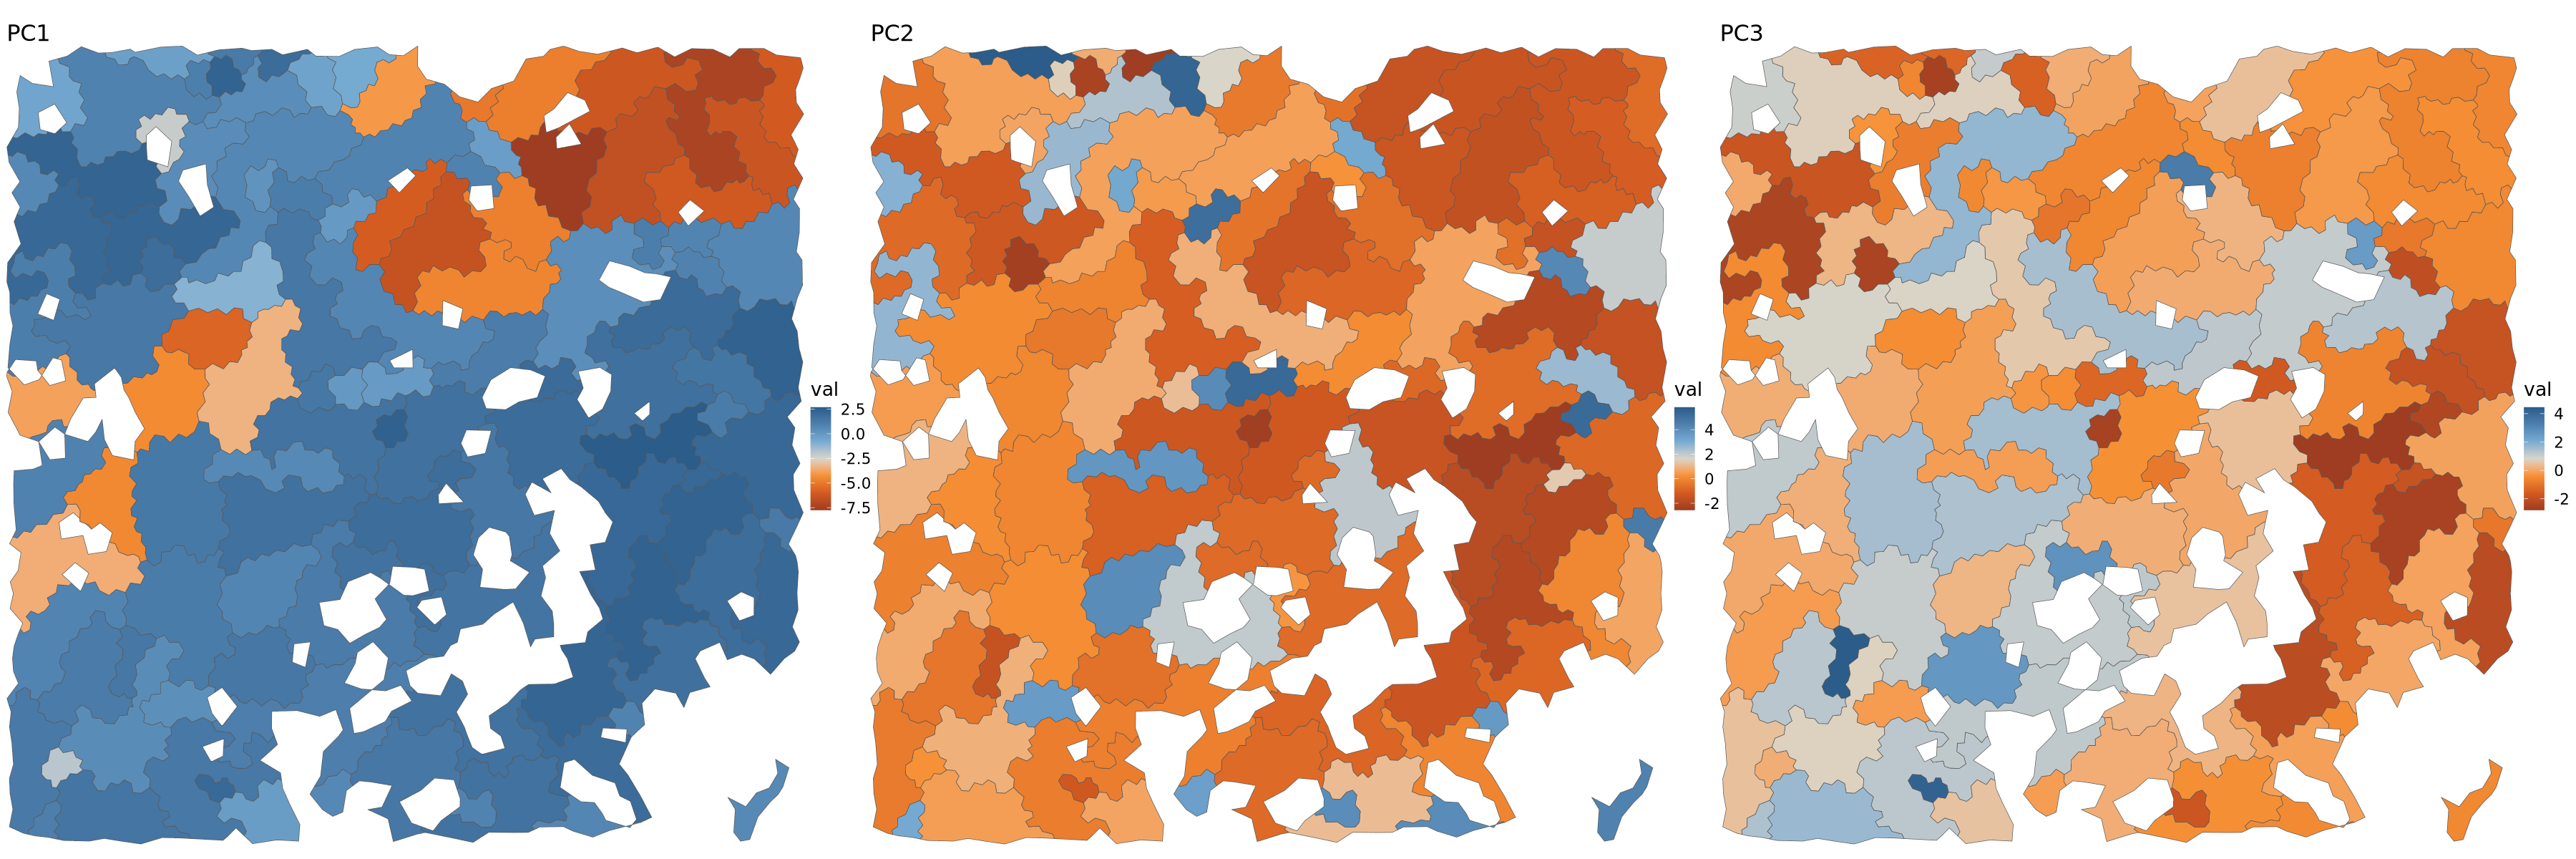

In [24]:
fig.size(10,30)
purrr::map(1:3, function(i) {
    ggplot(cbind(aggs$meta_data, val=aggs$pcs[, i])) +
        geom_sf(aes(geometry = shape, fill = val)) +
        theme_void(base_size = 16) +
        coord_sf(expand = FALSE) +
        scale_fill_gradient2_tableau() +
        guides(color = 'none') + 
        labs(title = glue('PC{i}')) +
        NULL
}) %>% purrr::reduce(`|`)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %capture
    ^


# Cluster and label tiles
Treating each aggregate as a unit of analysis

In [13]:
obj =  Seurat::CreateSeuratObject(
    counts = aggs$counts,
    meta.data = tibble::column_to_rownames(data.frame(dplyr::select(aggs$meta_data, -shape)), "id")
)
obj@meta.data$shape = aggs$meta_data$shape

In [14]:
.verbose = FALSE
obj = obj %>%
    NormalizeData(normalization.method  = 'LogNormalize', scale.factor = median(obj@meta.data$nCount_RNA), verbose=.verbose) %>%
    ScaleData(features = rownames(obj), verbose = .verbose) %>%
    RunPCA(npcs=20, features=rownames(obj), verbose=.verbose)  %>%
    RunUMAP(verbose=.verbose, dims=1:20) %>%
    Seurat::FindNeighbors(features=1:20, reduction='pca', verbose=.verbose) %>%
    Seurat::FindClusters(verbose=.verbose, resolution=c(2))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



In [17]:
table(obj@meta.data$seurat_clusters)


 0  1  2  3  4  5  6  7 
26 26 21 21 10  6  3  2 

In [20]:
dim(counts)

[1]  479 3177

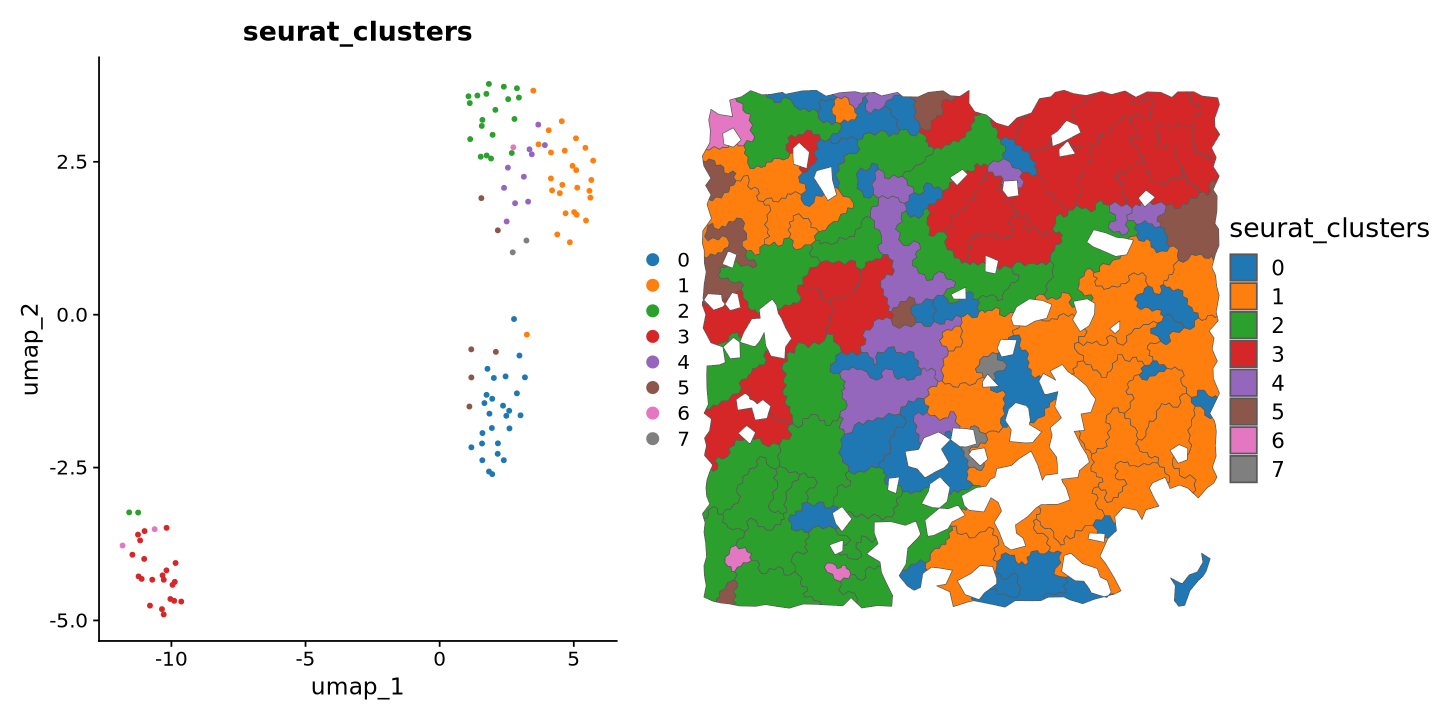

In [15]:
p1 = DimPlot(obj, reduction='umap', group.by='seurat_clusters') + scale_color_tableau('Classic 10')
p2 = ggplot(obj@meta.data) +
    geom_sf(aes(geometry=shape, fill=seurat_clusters)) +
    theme_void(base_size=16) +
    coord_sf(expand=FALSE) +
    scale_fill_tableau('Classic 10') +
    NULL
fig.size(6,12)
(p1 | p2) + plot_layout(widths = c(1,1))

# Transfer agg information to cells

NULL

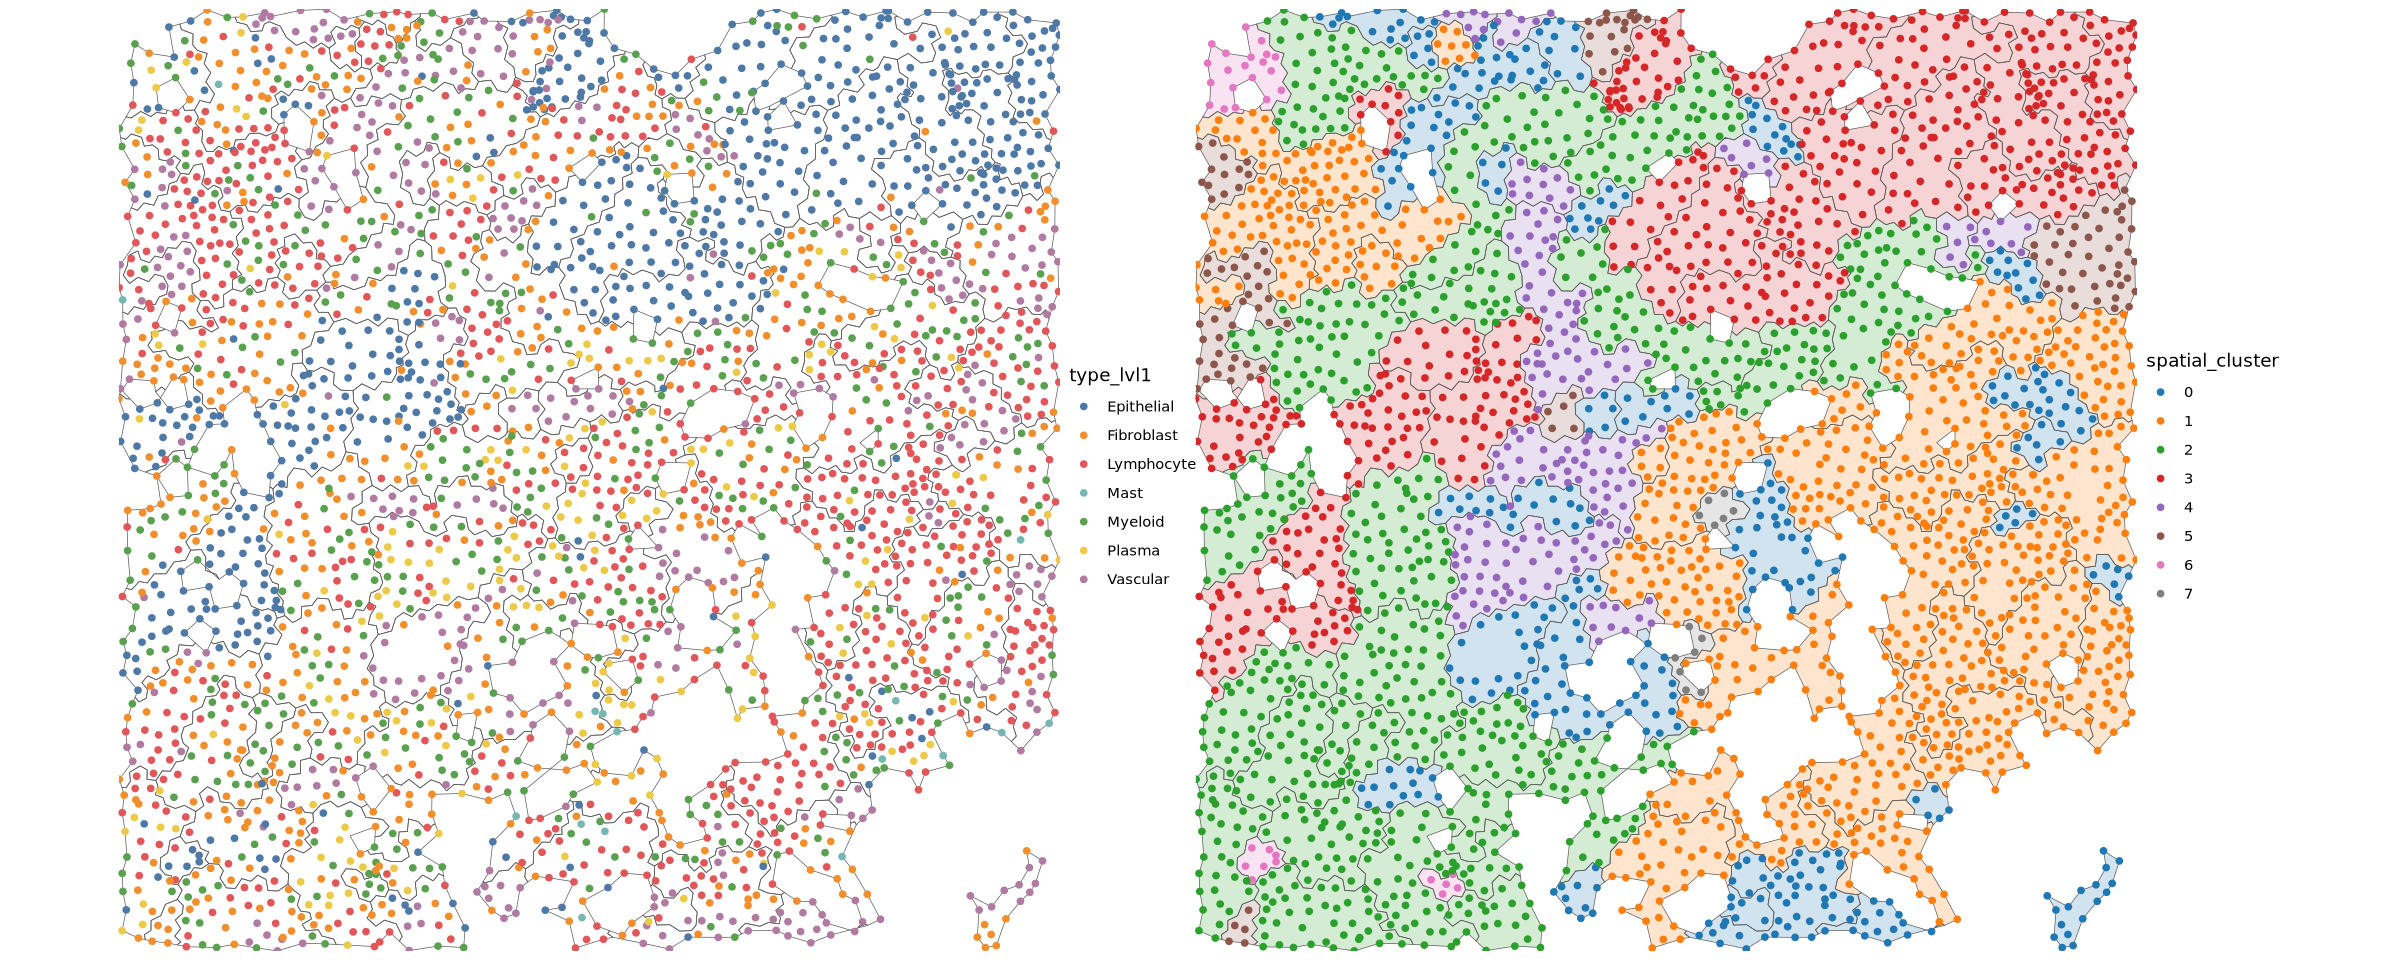

In [58]:
dmt$pts$spatial_cluster = obj@meta.data$seurat_clusters[dmt$pts$agg_id]
p1 = ggplot() +
    geom_sf(data = obj@meta.data, aes(geometry=shape), fill=NA) +
    geom_point(data=dmt$pts, aes(X,Y,color=type_lvl1)) +
    scale_color_tableau() + 
    theme_void() +
    coord_sf(expand=FALSE) +
    NULL
p2 = ggplot() +
    geom_sf(data=obj@meta.data, aes(geometry=shape, fill=seurat_clusters), alpha=.2) +
    geom_point(data=dmt$pts, aes(X,Y,color=spatial_cluster)) +
    scale_color_tableau('Classic 10') +
    scale_fill_tableau('Classic 10') +
    theme_void() +
    guides(fill='none') +
    coord_sf(expand=FALSE)
    NULL
fig.size(8,20)
p1 | p2

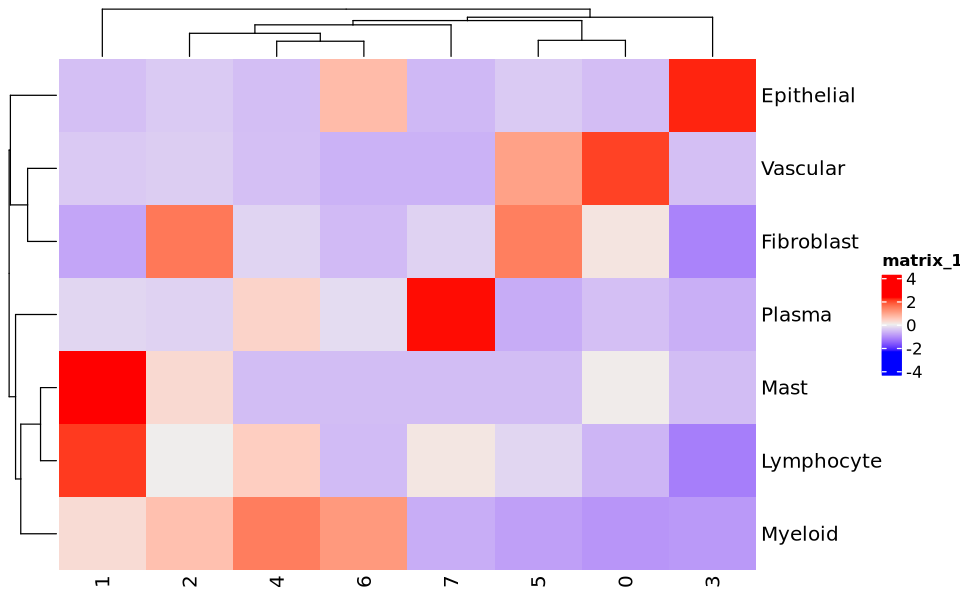

In [61]:
fig.size(5,8)
dmt$pts %>%
    with(table(type_lvl1, spatial_cluster)) %>%
    prop.table(2) %>%
    t %>% scale %>% t %>%
    Heatmap()

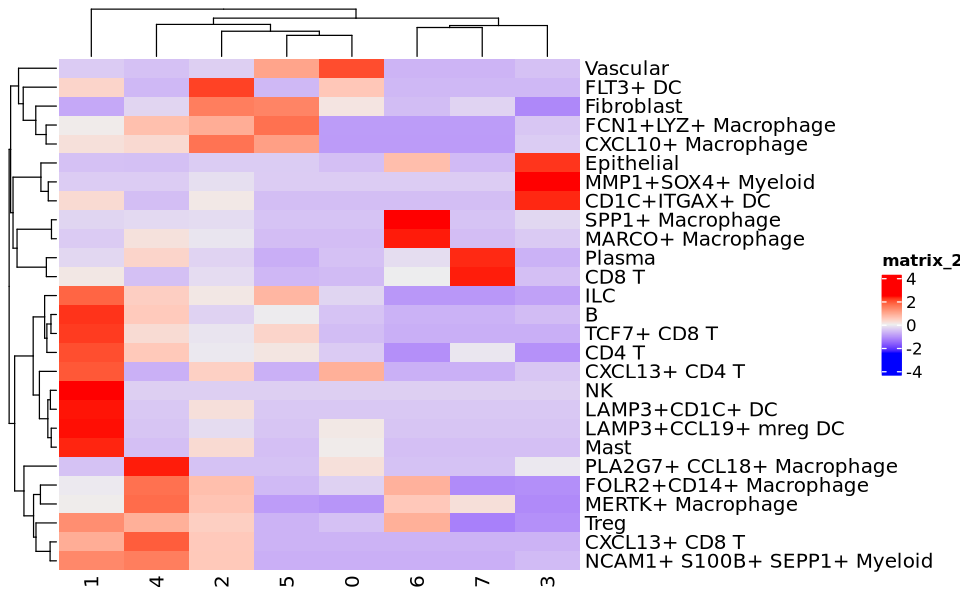

In [62]:
dmt$pts %>% 
    with(table(type_lvl2, spatial_cluster)) %>% 
    prop.table(2) %>% 
    t %>% scale %>% t %>% 
    Heatmap()